In [2530]:
from numpy.random import randint
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

OPTIMIZATION
    1. Take best model 
    2. round 

1% of permutation, 5 array length, 10 max digit, 100 epochs, 16 batch, 32 32 == 5% error

1% of permutation, 5 array length, 10 max digit, 100 epochs, 16 batch, 16 16 == 6% error

1% of permutation, 5 array length, 10 max digit, 100 epochs, 16 batch, 64 64 == 3% error

1% of permutation, 5 array length, 10 max digit, 100 epochs, 16 batch, 64 64 64 == 2% error

1% of permutation, 5 array length, 10 max digit, 100 epochs, 16 batch, 64 64 64 64 == 1.5% error

CHANGE to 10 length array

10^-5% of permutation, 10 array length, 10 max digit, 100 epochs, 16 batch, 64 64 64 64 == 5% error

Anche se ha visto molto meno da un buon risultato 

10^-4% of permutation, 10 array length, 10 max digit, 100 epochs, 16 batch, 64 64 64 64 == 3% error



In [2531]:
# parameters

modelPath = ""
modelName = "NNMedian.keras"

n_arrays = 2000
array_length = 5
max_digit = 10
epochs = 100
batch_size = 16

In [2532]:
# calculate number of permutation 
print("number of permutation: ", max_digit**array_length)
print("percentage of view:", (n_arrays * 0.5) * 100 / max_digit**array_length)

number of permutation:  100000
percentage of view: 1.0


In [2533]:
# generate input and output data

input_arrays = []
label_arrays = []
for _ in range(n_arrays):
    temp_array = randint(0, max_digit, array_length)
    temp_label = np.median(temp_array)
    input_arrays.append(temp_array)
    label_arrays.append(temp_label)

In [2534]:
print(len(input_arrays), len(label_arrays))

2000 2000


In [2535]:
# normalize 

for i in range(len(input_arrays)):
    input_arrays[i] = input_arrays[i].astype("float32") / (max_digit - 1)
    label_arrays[i] = label_arrays[i].astype("float32") / (max_digit - 1)

In [2536]:
# make np array 
input_arrays = np.array(input_arrays)
label_arrays = np.array(label_arrays)

In [2537]:
print(input_arrays[:10])
print(label_arrays[:10])

[[0.7777778  0.8888889  0.8888889  0.8888889  0.8888889 ]
 [0.7777778  0.7777778  0.5555556  0.11111111 0.11111111]
 [0.6666667  1.         0.22222222 0.         0.22222222]
 [0.         0.22222222 0.5555556  0.6666667  0.7777778 ]
 [0.11111111 0.5555556  0.5555556  0.5555556  0.8888889 ]
 [0.         1.         0.8888889  0.33333334 0.        ]
 [0.22222222 0.8888889  0.6666667  0.5555556  0.6666667 ]
 [0.6666667  0.5555556  1.         0.11111111 0.7777778 ]
 [1.         0.11111111 1.         1.         0.11111111]
 [0.7777778  0.6666667  0.7777778  0.33333334 0.22222222]]
[0.88888889 0.55555556 0.22222222 0.55555556 0.55555556 0.33333333
 0.66666667 0.66666667 1.         0.66666667]


In [2538]:
# split data 

n_train = int(0.5 * n_arrays)
n_val = int(0.25 * n_arrays)
n_eval = n_arrays - n_train - n_val

data_test = input_arrays[:n_train]
data_validation = input_arrays[n_train:(n_train+n_val)]
data_evaluation = input_arrays[n_train + n_val:]

label_test = label_arrays[:n_train]
label_validation = label_arrays[n_train:(n_train+n_val)]
label_evaluation = label_arrays[n_train + n_val:]

In [2539]:
print(data_test.shape, data_validation.shape, data_evaluation.shape)
print(label_test.shape, label_validation.shape, label_evaluation.shape)

(1000, 5) (500, 5) (500, 5)
(1000,) (500,) (500,)


In [2540]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(array_length))
x = layers.Dense(64, activation="relu") (inputs)
x = layers.Dense(64, activation="relu") (x)
x = layers.Dense(64, activation="relu") (x)
x = layers.Dense(64, activation="relu") (x)
outputs = layers.Dense(1, activation="sigmoid") (x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_130"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_132 (InputLayer)      [(None, 5)]               0         
                                                                 
 dense_422 (Dense)           (None, 64)                384       
                                                                 
 dense_423 (Dense)           (None, 64)                4160      
                                                                 
 dense_424 (Dense)           (None, 64)                4160      
                                                                 
 dense_425 (Dense)           (None, 64)                4160      
                                                                 
 dense_426 (Dense)           (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainab

In [2541]:
model.compile(
    optimizer="rmsprop", 
    loss="binary_crossentropy", 
    metrics=["mae"]
    )

In [2542]:
callbacks = [ 
    keras.callbacks.ModelCheckpoint(
    filepath=modelPath + modelName, 
    monitor="val_mae", 
    save_best_only=True,)
    ]

In [2543]:
history = model.fit(
    data_test, 
    label_test, 
    epochs=epochs, 
    batch_size=batch_size,
    validation_data=(data_validation, label_validation),
    callbacks=callbacks
    )

Epoch 1/100
63/63 [==============================] - 2s 8ms/step - loss: 0.6671 - mae: 0.1371 - val_loss: 0.6318 - val_mae: 0.1079
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6366 - mae: 0.0982 - val_loss: 0.6474 - val_mae: 0.1246
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6301 - mae: 0.0885 - val_loss: 0.6183 - val_mae: 0.0909
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6285 - mae: 0.0857 - val_loss: 0.6182 - val_mae: 0.0917
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6260 - mae: 0.0814 - val_loss: 0.6137 - val_mae: 0.0837
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6250 - mae: 0.0808 - val_loss: 0.6111 - val_mae: 0.0776
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6225 - mae: 0.0745 - val_loss: 0.6091 - val_mae: 0.0742
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6219 - m

In [2544]:
mae = history.history["mae"]
val_mae = history.history["val_mae"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
x_epochs = range(1, len(val_mae) + 1)

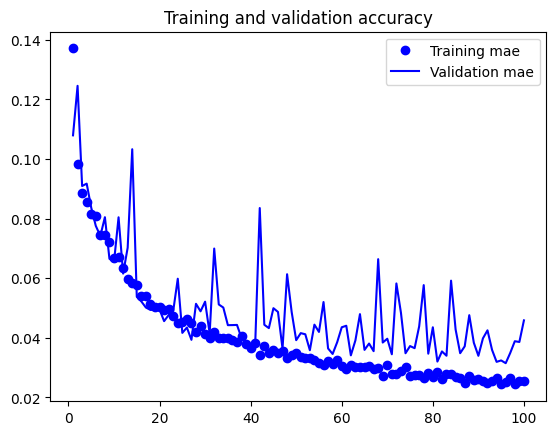

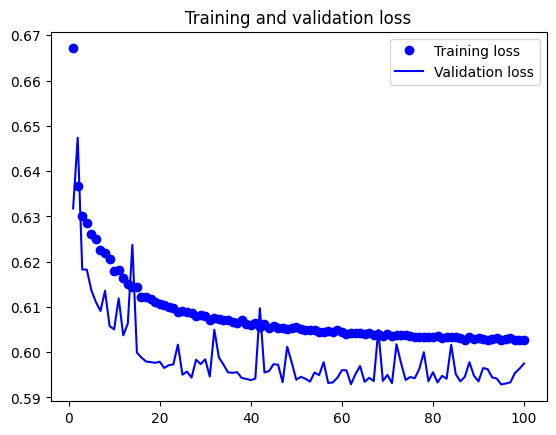

In [2545]:
plt.plot(x_epochs, mae, "bo", label="Training mae")
plt.plot(x_epochs, val_mae, "b", label="Validation mae")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(x_epochs, loss, "bo", label="Training loss")
plt.plot(x_epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [2546]:
model_best = keras.models.load_model(modelPath + modelName)

eval_loss, eval_mae = model_best.evaluate(data_evaluation, label_evaluation)
print(f"Evaluation accuracy: {eval_mae:.3f}")
eval_mae_perc = eval_mae * (max_digit - 1)
print(f"Evaluation mae denormalized: {eval_mae_perc:.2f}")

16/16 [==============================] - 0s 3ms/step - loss: 0.5976 - mae: 0.0338
Evaluation accuracy: 0.034
Evaluation mae denormalized: 0.30


In [2547]:
def denormalize(x):
    x = x * (max_digit - 1)
    return x

def rounding(x):
    x = round(x, 0)
    return x

predictions = model_best.predict(data_evaluation)
targets = label_evaluation

16/16 [==============================] - 0s 1ms/step


[6.605450391769409, 4.216993689537048, 5.139828622341156, 5.281532943248749, 5.2373086810112, 4.836527645587921, 4.488172262907028, 3.511652648448944, 2.801099807024002, 3.7727168798446655, 0.509630274027586, 2.8505071699619293, 5.790845274925232, 4.923846960067749, 1.9891888350248337, 6.202873885631561, 8.389676749706268, 6.905649662017822, 4.257398217916489, 4.743926525115967, 4.6903746128082275, 7.59459114074707, 6.544299244880676, 3.75264510512352, 0.01942810951732099]
[7.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 3.0, 4.0, 1.0, 3.0, 6.0, 5.0, 2.0, 6.0, 8.0, 7.0, 4.0, 5.0, 5.0, 8.0, 7.0, 4.0, 0.0]
[7.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 4.0, 3.0, 4.0, 1.0, 3.0, 6.0, 5.0, 2.0, 6.0, 9.0, 7.0, 4.0, 5.0, 5.0, 8.0, 7.0, 4.0, 1.0]


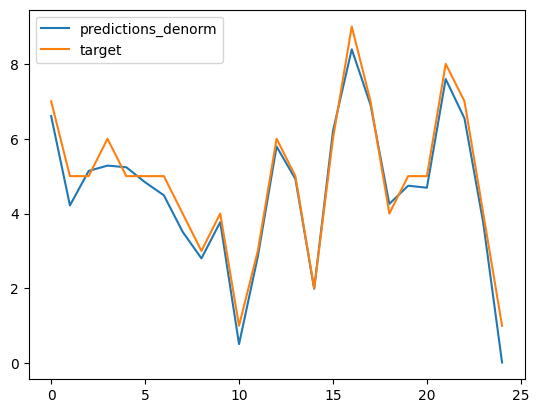

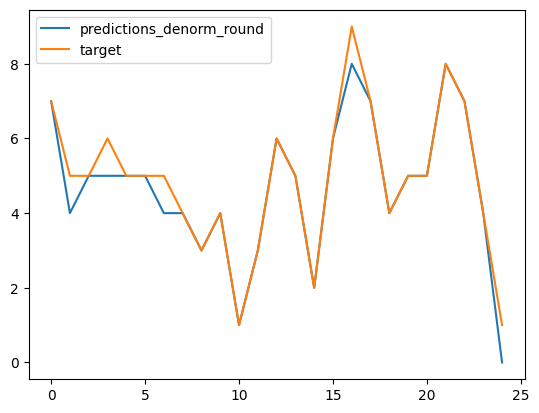

In [2548]:
x = []
predictions_denorm = []
predictions_denorm_round = []
targets_denorm = []
for i in range(len(predictions)):
    x.append(i)
    predictions_denorm.append(denormalize(float(predictions[i])))
    predictions_denorm_round.append(rounding(denormalize(float(predictions[i]))))
    targets_denorm.append(denormalize(targets[i]))

print(predictions_denorm[:25])
print(predictions_denorm_round[:25])
print(targets_denorm[:25])

plt.plot(x[:25], predictions_denorm[:25], label="predictions_denorm")
plt.plot(x[:25], targets_denorm[:25], label="target")
plt.legend(loc="upper left")
plt.show()

plt.plot(x[:25], predictions_denorm_round[:25], label="predictions_denorm_round")
plt.plot(x[:25], targets_denorm[:25], label="target")
plt.legend(loc="upper left")
plt.show()

In [2549]:
def mean_absolute_error(pre, tar):
    sum = 0
    n = len(pre)
    for i in range(n):
        sum += abs(tar[i] - pre[i])
    error = sum/n
    return error

In [2550]:
print("MAE of denormalized: ", mean_absolute_error(predictions_denorm, targets_denorm))
print("MAE of denormalized rounded: ", mean_absolute_error(predictions_denorm_round, targets_denorm))
print("Percentage error: ", round(mean_absolute_error(predictions_denorm_round, targets_denorm) * 100 / max_digit, 2), "%")

MAE of denormalized:  0.3046064174352214
MAE of denormalized rounded:  0.188
Percentage error:  1.88 %
